<a href="https://colab.research.google.com/github/mpHarm88/mpHarm88.github.io/blob/master/Mikio_Harman_DS8Porfolio1_3_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

df1 = pd.read_csv('./datasets/campaign/totals-2019-09-21T18_26_28.csv')
df2 = pd.read_csv('./datasets/campaign/totals-2019-09-21T18_26_05.csv')
df3 = pd.read_csv('./datasets/campaign/totals-2019-09-21T18_25_46.csv')
df4 = pd.read_csv('./datasets/campaign/totals-2019-09-21T18_24_08.csv')
df5 = pd.read_csv('./datasets/campaign/totals-2019-09-21T18_23_41.csv')
df6 = pd.read_csv('./datasets/campaign/totals-2019-09-21T18_23_13.csv')
df7 = pd.read_csv('./datasets/campaign/totals-2019-09-21T18_22_37.csv')
df8 = pd.read_csv('./datasets/campaign/totals-2019-09-21T18_22_05.csv')
df9 = pd.read_csv('./datasets/campaign/totals-2019-09-21T18_21_45.csv')
df10 = pd.read_csv('./datasets/campaign/totals-2019-09-21T18_21_29.csv')
df11 = pd.read_csv('./datasets/campaign/totals-2019-09-21T18_21_02.csv')

df12 = pd.read_excel('./datasets/campaign/SeriesReport-20190924003439_6e29d2.xlsx')

df12.shape

(51, 15)

In [8]:
# Cleaning and Filtering CPI
df12.head(100)
CPI = df12.iloc[10:51,:].reset_index()
CPI2 = CPI.iloc[[1,5,9,13,17,21,25],]
CPI3 = CPI.iloc[[29, 33, 37, 40],]
elect_CPI = pd.concat([CPI2, CPI3])
elect_CPI.head(12)
elect_CPI.columns = ['org_index', 'year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun',
                     'jul', 'aug', 'sept', 'oct', 'nov', 'dec', 'first_6_months', '"last_6_months']

elect_CPI.head(12)

,org_index,year,jan,feb,mar,apr,may,jun,jul,aug,sept,oct,nov,dec,first_6_months,"""last_6_months"
1,11,1980,77.8,78.9,80.1,81,81.8,82.7,82.7,83.3,84,84.8,85.5,86.3,NaN,NaN
5,15,1984,101.9,102.4,102.6,103.1,103.4,103.7,104.1,104.5,105,105.3,105.3,105.3,102.9,104.9
9,19,1988,115.7,116,116.5,117.1,117.5,118,118.5,119,119.8,120.2,120.3,120.5,116.8,119.7
13,23,1992,138.1,138.6,139.3,139.5,139.7,140.2,140.5,140.9,141.3,141.8,142,141.9,139.2,141.4
17,27,1996,154.4,154.9,155.7,156.3,156.6,156.7,157,157.3,157.8,158.3,158.6,158.6,155.8,157.9
21,31,2000,168.8,169.8,171.2,171.3,171.5,172.4,172.8,172.8,173.7,174,174.1,174,170.8,173.6
25,35,2004,185.2,186.2,187.4,188,189.1,189.7,189.4,189.5,189.9,190.9,191,190.3,187.6,190.2
29,39,2008,211.08,211.693,213.528,214.823,216.632,218.815,219.964,219.086,218.783,216.573,212.425,210.228,214.429,216.177
33,43,2012,226.665,227.663,229.392,230.085,229.815,229.478,229.104,230.379,231.407,231.317,230.221,229.601,228.85,230.338
37,47,2016,236.916,237.111,238.132,239.261,240.229,241.018,240.628,240.849,241.428,241.729,241.353,241.432,238.778,241.237


In [14]:
#Making CPI function
historical = {1980: 82.4, 1984: 102.9, 1988: 116.8, 1992: 139.2, 1996: 155.8,
              2000: 170.8, 2004: 187.5, 2008: 214.429, 2012: 228.85, 2016: 238.778,}

def set_CPI(x):
    return historical.get(x)

set_CPI(1980)

82.4

In [15]:
e20 = df11.sort_values(by='receipts', ascending=False)
e16 = df10.sort_values(by='receipts', ascending=False)
e12 = df9.sort_values(by='receipts', ascending=False)
e08 = df8.sort_values(by='receipts', ascending=False)
e04 = df7.sort_values(by='receipts', ascending=False)
e00 = df6.sort_values(by='receipts', ascending=False)
e96 = df5.sort_values(by='receipts', ascending=False)
e92 = df4.sort_values(by='receipts', ascending=False)
e88 = df3.sort_values(by='receipts', ascending=False)
e84 = df2.sort_values(by='receipts', ascending=False)
e80 = df1.sort_values(by='receipts', ascending=False)

e20.shape 

(895, 43)

In [16]:
e80_20 = pd.concat([e20,e16,e12,e08,e04,e00,e96,e92,e88,e84,e80], ignore_index=False)
election = e80_20.sort_values(by='receipts', ascending=False)
print(election.shape)

# Creating dataframe with top 25 canidates with most receipts
top25_receipts = election[['name', 'party_full', 'party', 'election_year', 'receipts', 'disbursements']]
top25_receipts = top25_receipts.reset_index()
print(top25_receipts.shape)
del top25_receipts['index']
top25_receipts['election_year'] = top25_receipts['election_year'].astype(float)
top25_receipts.dtypes

(5332, 43)
(5332, 7)


name              object
party_full        object
party             object
election_year    float64
receipts         float64
disbursements    float64
dtype: object

In [17]:
print(df10.shape)
df10.head(1)

#Creating a New Column with adjusted CPI values for receipts and sorting by that column
top25_receipts['CPI_index'] = top25_receipts['election_year'].map(historical)
top25_receipts['inflated_value_receipts'] = ((258.558 - top25_receipts['CPI_index'])/top25_receipts['CPI_index'])*top25_receipts['receipts'] + top25_receipts['receipts']
top25_receipts = top25_receipts.sort_values(by='inflated_value_receipts', ascending=False)


print(top25_receipts.shape)
top25_receipts.head(15)

(1774, 43)
(5332, 8)


,name,party_full,party,election_year,receipts,disbursements,CPI_index,inflated_value_receipts
0,"OBAMA, BARACK",DEMOCRATIC PARTY,DEM,2008.0,7.786430e+08,7.603702e+08,214.429,9.388859e+08
1,"OBAMA, BARACK",DEMOCRATIC PARTY,DEM,2012.0,7.426019e+08,7.575750e+08,228.850,8.390023e+08
2,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEMOCRATIC PARTY,DEM,2016.0,5.856991e+08,5.855806e+08,238.778,6.342175e+08
3,"ROMNEY, MITT / RYAN, PAUL D.",REPUBLICAN PARTY,REP,2012.0,4.836429e+08,4.832922e+08,228.850,5.464267e+08
5,"BUSH, GEORGE W",REPUBLICAN PARTY,REP,2004.0,3.778464e+08,3.657300e+08,187.500,5.210412e+08
6,"KERRY, JOHN F",DEMOCRATIC PARTY,DEM,2004.0,3.515983e+08,3.328041e+08,187.500,4.848456e+08
4,"MCCAIN, JOHN S.",REPUBLICAN PARTY,REP,2008.0,4.015371e+08,3.751593e+08,214.429,4.841726e+08
7,"TRUMP, DONALD J. / MICHAEL R. PENCE",REPUBLICAN PARTY,REP,2016.0,3.506684e+08,3.430567e+08,238.778,3.797173e+08
8,"CLINTON, HILLARY RODHAM",DEMOCRATIC PARTY,DEM,2008.0,2.522355e+08,2.506608e+08,214.429,3.041450e+08
10,"BUSH, GEORGE W",REPUBLICAN PARTY,REP,2000.0,1.936577e+08,1.864560e+08,170.800,2.931602e+08


In [18]:
#Isolating Democrats and Republicans
dem_inflated = top25_receipts.loc[top25_receipts['party']=='DEM',:]
rep_inflated = top25_receipts.loc[top25_receipts['party']=='REP',:]

dem_rep_inflated = pd.concat([dem_inflated, rep_inflated], ignore_index=False).sort_values(by='inflated_value_receipts', ascending=False)

dem_rep_inflated.head()

,name,party_full,party,election_year,receipts,disbursements,CPI_index,inflated_value_receipts
0,"OBAMA, BARACK",DEMOCRATIC PARTY,DEM,2008.0,7.786430e+08,7.603702e+08,214.429,9.388859e+08
1,"OBAMA, BARACK",DEMOCRATIC PARTY,DEM,2012.0,7.426019e+08,7.575750e+08,228.850,8.390023e+08
2,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEMOCRATIC PARTY,DEM,2016.0,5.856991e+08,5.855806e+08,238.778,6.342175e+08
3,"ROMNEY, MITT / RYAN, PAUL D.",REPUBLICAN PARTY,REP,2012.0,4.836429e+08,4.832922e+08,228.850,5.464267e+08
5,"BUSH, GEORGE W",REPUBLICAN PARTY,REP,2004.0,3.778464e+08,3.657300e+08,187.500,5.210412e+08


### Creating a dataframe that show the total made and spent during the entire election by Republican and Democrats

In [21]:
election_receipt_year = election[['candidate_election_year', 'receipts', 'disbursements']]
election_receipt_year1 = election_receipt_year.groupby(['candidate_election_year']).sum()
election_receipt_year1 = election_receipt_year1.reset_index()
election_receipt_year1.head()

,candidate_election_year,receipts,disbursements
0,1980,1.866970e+08,1.974798e+08
1,1984,2.328998e+08,2.289814e+08
2,1988,3.871944e+08,3.805149e+08
3,1992,3.563210e+08,3.468471e+08
4,1996,4.868588e+08,4.784000e+08


In [22]:
dem = election.loc[election['party']=='DEM',:]
rep = election.loc[election['party']=='REP',:]
ind = election.loc[election['party']=='IND',:]

dem_rep_no_group = pd.concat([dem, rep]).reset_index(drop=True)
dem_rep_no_group = dem_rep_no_group.sort_values(by='receipts', ascending=False)

dem2 = dem[['candidate_election_year', 'receipts', 'disbursements', 'party', 'party_full']]
dem2 = dem2.groupby(['candidate_election_year']).sum().reset_index()
dem2['party'] = 'DEM'
print(dem2.head())

rep2 = rep[['candidate_election_year', 'receipts', 'disbursements', 'party', 'party_full']]
rep2 = rep2.groupby(['candidate_election_year']).sum().reset_index()
rep2['party'] = 'REP'
print(rep2.head())

ind2 = ind[['candidate_election_year', 'receipts', 'disbursements', 'party', 'party_full']]
ind2 = ind2.groupby(['candidate_election_year']).sum().reset_index()
ind2['party'] = 'IND'
print(ind2.head())

dem2.head()

   candidate_election_year     receipts  disbursements party
0                     1980   42381181.0     58641309.0   DEM
1                     1984  153761520.0    149298393.0   DEM
2                     1988  187165762.0    183426619.0   DEM
3                     1992  162330170.0    155164784.0   DEM
4                     1996  129095102.0    128929122.0   DEM
   candidate_election_year      receipts  disbursements party
0                     1980  1.157994e+08   1.125131e+08   REP
1                     1984  7.663196e+07   7.735390e+07   REP
2                     1988  1.947980e+08   1.919081e+08   REP
3                     1992  1.177505e+08   1.155034e+08   REP
4                     1996  3.096208e+08   3.042453e+08   REP
   candidate_election_year    receipts  disbursements party
0                     1980  24489624.0     22312960.0   IND
1                     1984    256639.0       245337.0   IND
2                     1988   2656359.0      2639775.0   IND
3                     

,candidate_election_year,receipts,disbursements,party
0,1980,42381181.0,58641309.0,DEM
1,1984,153761520.0,149298393.0,DEM
2,1988,187165762.0,183426619.0,DEM
3,1992,162330170.0,155164784.0,DEM
4,1996,129095102.0,128929122.0,DEM


###Making DF for 3rd chart with error lines

In [23]:
dri = pd.concat([dem2, rep2]).reset_index(drop=True)
dri2 = dri.rename(columns={"candidate_election_year":"Year", "receipts":"Receipts", "disbursements":"Disbursements", "party":"Party"})

#creating an inflated receipts column
dri2['CPI_index'] = dri2['Year'].map(historical)
dri2['inflated'] = ((258.558 - dri2['CPI_index'])/dri2['CPI_index'])*dri2['Receipts'] + dri2['Receipts']


dri4 = dri2[['Year', 'inflated']]
dri6 = dri4.groupby('Year').inflated.mean()
dri6 = dri6.reset_index()

dri2

,Year,Receipts,Disbursements,Party,CPI_index,inflated
0,1980,4.238118e+07,5.864131e+07,DEM,82.400,1.329854e+08
1,1984,1.537615e+08,1.492984e+08,DEM,102.900,3.863583e+08
2,1988,1.871658e+08,1.834266e+08,DEM,116.800,4.143254e+08
3,1992,1.623302e+08,1.551648e+08,DEM,139.200,3.015213e+08
4,1996,1.290951e+08,1.289291e+08,DEM,155.800,2.142399e+08
5,2000,1.896641e+08,1.761889e+08,DEM,170.800,2.871146e+08
6,2004,5.389059e+08,5.176750e+08,DEM,187.500,7.431383e+08
7,2008,1.160035e+09,1.135604e+09,DEM,214.429,1.398767e+09
8,2012,7.592449e+08,7.741979e+08,DEM,228.850,8.578057e+08
9,2016,8.394991e+08,8.338547e+08,DEM,238.778,9.090420e+08


In [24]:
names_years = pd.DataFrame({'names_year': ['Barack Obama (D) - 2008',
                                           'Barack Obama (D) - 2012',
                                           'Hillary Clinton / Timothy Kaine (D) - 2016',
                                           'Mitt Romney / Paul Ryan (R) - 2012',
                                           'John McCain (R) - 2008',
                                           'George W. Bush (R) - 2004',
                                           'John Kerry (D) - 2004',                                           
                                           'Donald Trump / Michael Pence (R) - 2016',
                                           'Hillary Clinton (D) - 2008',
                                           'Bernard Sanders (D) - 2016',
                                           'George W. Bush (R) - 2000',                                        
                                           'Robert Dole (R) - 1996',
                                           'Bill Clinton (D) - 1992',
                                           'Walter Mondale (D) - 1984',
                                           'Bill Clinton (D) - 1996',
                                           'George H.W. Bush (R) - 1988',
                                           'Michael Dukakis (D) - 1988',
                                           'Ronald Reagan (R) - 1980',
                                           'Ronald Reagan (R) - 1984',
                                           'George H.W. Bush (R) - 1992']})

names_years

,names_year
0,Barack Obama (D) - 2008
1,Barack Obama (D) - 2012
2,Hillary Clinton / Timothy Kaine (D) - 2016
3,Mitt Romney / Paul Ryan (R) - 2012
4,John McCain (R) - 2008
5,George W. Bush (R) - 2004
6,John Kerry (D) - 2004
7,Donald Trump / Michael Pence (R) - 2016
8,Hillary Clinton (D) - 2008
9,Bernard Sanders (D) - 2016


In [25]:
dem_rep_names_fixed2 = pd.concat([dem_rep_inflated.head(20), names_years], axis=1, ignore_index=False)
dem_rep_names_fixed3 = dem_rep_names_fixed2
dem_rep_names_fixed3 = dem_rep_names_fixed3.sort_values(by='inflated_value_receipts', ascending=False).reset_index()
dem_rep_names_fixed3.shape

(24, 10)

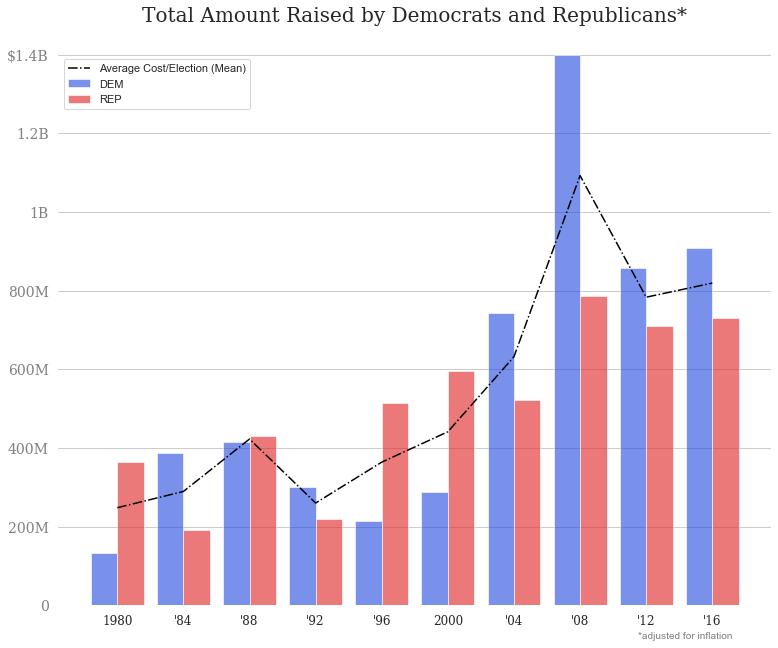

In [29]:
# ["Ronald Reagan(R) v. Jimmy Carter(D) - 1980", 
#                           "Ronald Reagan(R) v. Walter Mondale(D) - '84",
#                           "George H.W. Bush(R) v. Michael Dukakis(D) - '88",
#                           "Bill Clinton(D) v. George H.W. Bush(R) -'92",
#                           "Bill Clinton(D) v. Bob Dole(R) - '96", 
#                           "George W. Bush(R) v. Al Gore(D) - 2000",
#                           "George W. Bush(R) v. John Kerry(D) - '04", 
#                           "Barack Obama(D) v. John McCain(R) - '08",
#                           "Barack Obama(D) v. Mitt Romney(R) - '12",
#                           "Donald Trump (R) v. Hillary Clinton(D) - '16",
#                           "Donald Trump(R) v. ? - '20"]

sns.set_style("whitegrid")
color_palette = ['#0036fc','#ff0000']

b = sns.catplot(x='Year', y='inflated', 
                hue='Party',
                data=dri2, 
                kind='bar',
                height=9, 
                palette=color_palette, 
                aspect=1.2, 
                legend=False,
                alpha=.6)

plt.plot([0,1,2,3,4,5,6,7,8,9,0], 
         'inflated', 
         data=dri6, 
         color='#000000', 
         linestyle='dashdot',
         label='Average Cost/Election (Mean)',
         linewidth=1.5)

plt.title('Total Amount Raised by Democrats and Republicans*', 
          fontsize=20,
          family='serif')

plt.legend(loc="upper left", 
           bbox_to_anchor=(0, .955, 0, 0))

b.set_ylabels(label='', 
              fontsize=15)

b.set_xlabels(label='Election Year', 
              fontsize=15)

b.set_xticklabels(labels=["1980", 
                          "'84",
                          "'88",
                          "'92",
                          "'96", 
                          "2000",
                          "'04", 
                          "'08",
                          "'12",
                          "'16",
                          "'20"], 
                  fontsize=12,
                  family='serif')

b.set_yticklabels(labels=[0,'200M','400M','600M','800M','1B','1.2B', '$1.4B'],
                  fontsize=14,
                  color='grey',
                  family='serif')

b.set_xlabels("*adjusted for inflation", 
              fontsize=10, 
              x=.88,
              y=1,
              color='grey')

b.despine(left=True,bottom=True);

In [34]:
b.savefig("chart1.png", dpi=400, transperant=True)

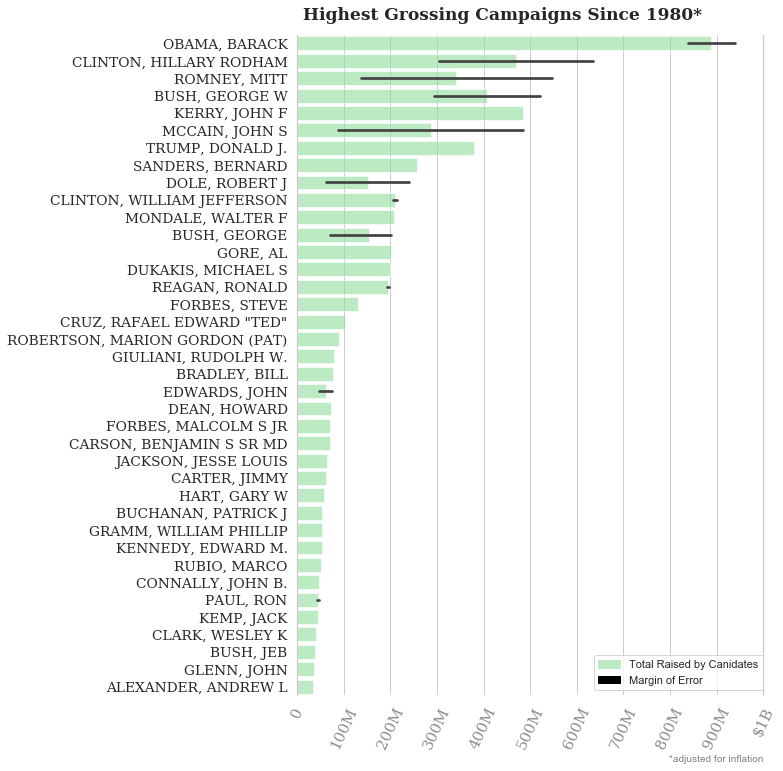

In [35]:
#Combining Hillary Clinton rows into the same row
dem_rep_inflated.iloc[2, 0] = 'CLINTON, HILLARY RODHAM'
dem_rep_inflated.iloc[3, 0] = 'ROMNEY, MITT'
dem_rep_inflated.iloc[7, 0] = 'TRUMP, DONALD J.'
dem_rep_inflated.iloc[6, 0] = 'MCCAIN, JOHN S'

dem_rep_inflated2 = dem_rep_inflated['name'].map(historical)

sns.set(style="whitegrid", font='sans-serif')
colorP = ['#83ea91']
g = sns.catplot(x="inflated_value_receipts", 
                y="name", 
                kind="bar", 
                orient='h',
                data=dem_rep_inflated.head(50),
                height=10, 
                aspect=1,
                palette=colorP,
                alpha=.6,
                legend=True)
plt.xticks(ticks=[0,100000000, 200000000, 300000000, 400000000,500000000, 600000000,700000000, 800000000,900000000, 1000000000])
g.set_xticklabels(labels=[0,'100M','200M','300M','400M','500M','600M','700M','800M','900M','$1B'],
                  fontsize=15,
                  color='#8c8c8c',
                  family='serif')
plt.xticks(rotation=65)
g.set_yticklabels(fontsize=13.75, 
                  family='serif',
                  
                  )
g.despine(right=False, 
          left=False, 
          bottom=True, 
          top=True)
g.set_ylabels("")
g.set_xlabels("*adjusted for inflation", 
              fontsize=10,
              x=.9,
              y=1,
              color='grey')
plt.title('Highest Grossing Campaigns Since 1980*',
          x=0.44,
          fontsize=17,
          fontweight='bold',
          loc='center',
          pad=15,
          family='serif')

std_dev = mpatches.Patch(color='black', label='Margin of Error')
green_block = mpatches.Patch(color='#BCEAC2', label='Total Raised by Canidates')
plt.legend(loc=4, 
           bbox_to_anchor=(0, 0, 1.011, 0),
           handles=[green_block, std_dev]);

In [36]:
g.savefig("chart2.png", dpi=400, transperant=True)

In [28]:
dem_rep_inflated.loc[dem_rep_inflated['name']=='PANCAKES, CHOCOLATE',:].head()

,name,party_full,party,election_year,receipts,disbursements,CPI_index,inflated_value_receipts
3838,"PANCAKES, CHOCOLATE",REPUBLICAN PARTY,REP,2020.0,0.0,0.0,NaN,NaN


In [ ]:
dem_rep_inflated.shape

(2118, 8)